In [122]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Exercise 6.17

Use natural cubic splines interpolation (based on Lagrange-form polynomials \[Eqs. (6.86)-(6.89)\]) with the data in Problem 6.13; to calculate the power of the following windspeeds:

* 24 mph
* 35 mph

|Wind Speed (mph) |14 |22 |30 |38 |46 |
|-----------------|---|---|---|---|---|
|Elecitrc Power(W)|320|490|540|500|480|

In [162]:
x = np.array([14, 22, 30, 38, 46])
y = np.array([320, 490, 540, 500, 480])
n = x.shape[0]

In [261]:
#For plotting
EXTRAPOLATE=True
xleft = 12
xright = 50

## Solution

The polynomial in the i-th segment (\[i, i+1\]) is given by:
$$f_i(x) = \frac{a_i}{6h_i}(x_{i+1} - x)^3 + \frac{a_{i+1}}{6h_i}(x- x_i)^3 + [\frac{y_i}{h_i} - \frac{a_ih_i}{6}](x_{i+1} - x) + [\frac{y_{i+1}}{h_i} - \frac{a_{i+1}h_i}{6}](x - x_i)$$

The system of equations is given by:
$$h_ia_i + 2(h_i + h_{i+1})a_{i+1} + h_{i+1}a_{i+2} = 6[\frac{y_{i+2} - y_{i+1}}{h_{i+1}} - \frac{y_{i+1} - y_i}{h_i}]$$
$$ i = 1,2,\ldots,n-2 $$

And
$$h_i = x_{i+1} - x_i$$

In [262]:
def get_function(x, a, i):
    h = lambda i: x[i+1] - x[i]
    
    return lambda X: (a[i]/(6*h(i)))*(x[i+1]-X)**3 + (a[i+1]/(6*h(i)))*(X-x[i])**3 + \
        (y[i]/h(i) - (a[i]*h(i))/6)*(x[i+1] - X) + (y[i+1]/h(i) - (a[i+1]*h(i))/6)*(X-x[i])

In [263]:
def get_system(x, y):
    n = np.shape(x)[0]
    A = np.zeros((n, n))
    b = np.zeros(n)
    #a_0 = 0
    A[0,0] = 1
    b[0] = 0
    #a_n-1 = 0
    A[n-1,n-1] = 1
    b[n-1]= 0
    
    h = lambda i: x[i+1] - x[i]
    
    # We go from 1 to n-2, filling the equations (n-1 is excluded in range())
    # The index has been shifted to the left, so it is more symmetric
    for i in range(1, n-1):
        #a_{i-1}
        A[i, i-1] = h(i-1)
        #a_i
        A[i, i] = 2*(h(i-1) + h(i))
        #a_{i+1}
        A[i, i+1] = h(i)
        
        b[i] = 6 * ((y[i+1] - y[i])/h(i) - (y[i] - y[i-1])/h(i-1))
    
    return A, b

In [264]:
A, b = get_system(x, y)

In [265]:
A

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 8., 32.,  8.,  0.,  0.],
       [ 0.,  8., 32.,  8.,  0.],
       [ 0.,  0.,  8., 32.,  8.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [266]:
b

array([  0. , -90. , -67.5,  15. ,   0. ])

We solve the system:

In [267]:
a = np.linalg.solve(A, b)

In [268]:
a

array([ 5.32907052e-15, -2.37723214e+00, -1.74107143e+00,  9.04017857e-01,
        0.00000000e+00])

Get a list of n-1 functions, and build a piecewise function

In [269]:
functions = [get_function(x, a, i) for i in range(n-1)]

In [270]:
def is_in_section(x, xs, i, extrapolate=False):
    n = xs.shape[0]
    # Is x in section i of xs ?
    
    if (extrapolate):
        if i==0:
            return x < xs[1]
        if i==n-2:
            return x >= xs[n-2]
    
    return np.bitwise_and(x >= xs[i], x <= xs[i+1])

In [271]:
def build_piecewise(xaxis, xs, functions):
    return np.piecewise(xaxis, \
                        [is_in_section(xaxis, xs, i) for i in range(len(functions))], \
                        functions)

# This is callable
def piecewise_func(x, xs, functions, extrapolate):
    n = xs.shape[0]
    for i in range(n-1):
        if is_in_section(x, xs, i, extrapolate=extrapolate):
            return functions[i](x)

def build_piecewise2(xaxis, xs, functions, extrapolate=False):
    l = lambda x: piecewise_func(x, xs, functions, extrapolate)
    return np.vectorize(l)(xaxis), l

In [272]:
xaxis = np.linspace(xleft, xright, xright-xleft+1)
xaxis

array([12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.,
       25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.,
       38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [273]:
# piecewise = build_piecewise(xaxis, x, functions)
piecewise, F = build_piecewise2(xaxis, x, functions, extrapolate=EXTRAPOLATE)

In [274]:
piecewise

array([271.55691964, 295.62988281, 320.        , 344.37011719,
       368.44308036, 391.92173549, 414.50892857, 435.90750558,
       455.8203125 , 473.95019531, 490.        , 503.73535156,
       515.17299107, 524.39243862, 531.47321429, 536.49483817,
       539.53683036, 540.67871094, 540.        , 537.62207031,
       533.83370536, 528.96554129, 523.34821429, 517.31236049,
       511.18861607, 505.30761719, 500.        , 495.52246094,
       491.8359375 , 488.82742746, 486.38392857, 484.39243862,
       482.73995536, 481.31347656, 480.        , 478.68652344,
       477.26004464, 475.60756138, 473.61607143])

In [275]:
P1 = (24, F(24))
P2 = (35, F(35))
print(P1, P2)

(24, 515.1729910714286) (35, 517.3123604910714)


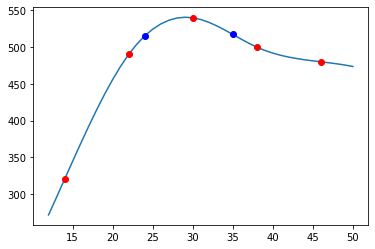

In [276]:
plt.plot(xaxis, piecewise)
for i in range(n):
    plt.plot(x[i], y[i], 'ro')

plt.plot(*P1, 'bo')
plt.plot(*P2, 'bo')
plt.show()